In [1]:
# 20190523

In [7]:
# load and normalize CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

# 加载数据并标准化

# transform datasets from [0,1] to [-1,1]
transform = transforms.Compose([ # Compose: 组成
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [ ]:
!ping baidu.com

In [8]:
test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified


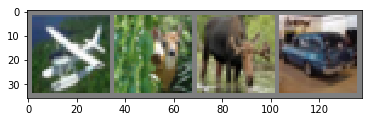

plane  deer  deer   car


In [10]:
# 展示一些图片看看
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
datadir = iter(train_loader)
images, labels = datadir.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [17]:
# 定义网络结构
import torch.nn as nn
import torch.nn.functional as F

# conv1 -> pool -> conv2 -> fc1 -> fc2 -> fc3
class Net(nn.Module):
    def __init__(self):
        # 先定义好网络的组件
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    # 开始组装网络
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
net = Net()

In [19]:
# 定义损失函数和优化器
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
# 训练模型
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        # 前向 + 反向 + 优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step()
        
        # 打印统计过程
        # print(type(running_loss))
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.325
[1,  4000] loss: 1.321
[1,  6000] loss: 1.290
[1,  8000] loss: 1.283
[1, 10000] loss: 1.263
[1, 12000] loss: 1.225
[2,  2000] loss: 1.164
[2,  4000] loss: 1.186
[2,  6000] loss: 1.176
[2,  8000] loss: 1.158
[2, 10000] loss: 1.160
[2, 12000] loss: 1.151
Finished Training


In [23]:
# 在GPU上训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [26]:
net.to(device)
# 定义损失函数和优化器
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [27]:
# 训练模型
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # 前向 + 反向 + 优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step()
        
        # 打印统计过程
        # print(type(running_loss))
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.077
[1,  4000] loss: 1.089
[1,  6000] loss: 1.073
[1,  8000] loss: 1.088
[1, 10000] loss: 1.077
[1, 12000] loss: 1.099
[2,  2000] loss: 1.025
[2,  4000] loss: 1.006
[2,  6000] loss: 1.011
[2,  8000] loss: 1.020
[2, 10000] loss: 1.041
[2, 12000] loss: 1.022
Finished Training
